# Explore here

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
%matplotlib inline


# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(df.shape)
print(df.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
#All features are numerical 

print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


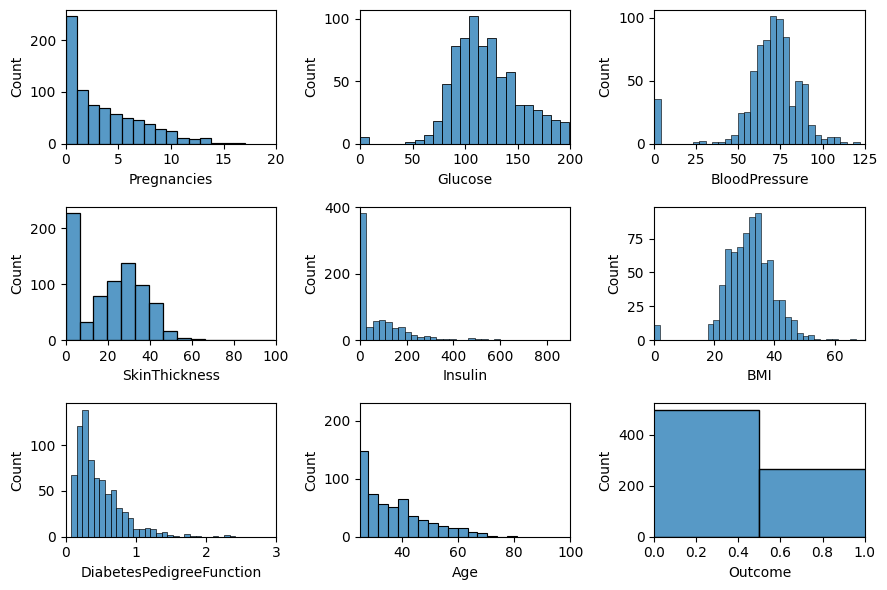

In [11]:
fig, axis = plt.subplots(3, 3, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set_xlim(0, 20)  
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set_xlim(0, 200)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlim = (0, 125))  
sns.histplot(ax = axis[1, 0], data = df, x = "SkinThickness").set_xlim(0, 100)
sns.histplot(ax = axis[1, 1], data = df, x = "Insulin").set(xlim = (0, 900))
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set_xlim(0, 70)
sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction").set_xlim(0, 3)
sns.histplot(ax = axis[2, 1], data = df, x = "Age").set_xlim(25, 100)
sns.histplot(ax = axis[2, 2], data = df, x = "Outcome", bins=[0,1,2], discrete=True).set_xlim(0, 1)

plt.tight_layout()

# Show the plot
plt.show()

In [22]:

print(df["Glucose"].value_counts().get(0,0))
print(df["BMI"].value_counts().get(0,0))
print(df["BloodPressure"].value_counts().get(0,0))
print(df["SkinThickness"].value_counts().get(0,0))
print(df["Insulin"].value_counts().get(0,0))

5
11
35
227
374


In [23]:
df[df["Glucose"] == 0]
df[df["BMI"] == 0]
df[df["BloodPressure"] == 0]
df[df["SkinThickness"] == 0]
df[df["Insulin"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set_xlim(0, 20)  
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set_xlim(30, 200)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlim = (20, 125))  
sns.histplot(ax = axis[1, 0], data = df, x = "SkinThickness").set_xlim(0, 100)
sns.histplot(ax = axis[1, 1], data = df, x = "Insulin").set(xlim = (0, 900))
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set_xlim(0, 70)
sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction").set_xlim(0, 3)
sns.histplot(ax = axis[2, 1], data = df, x = "Age").set_xlim(25, 100)
sns.histplot(ax = axis[2, 2], data = df, x = "Outcome", bins=[0,1,2], discrete=True).set_xlim(0, 1)

plt.tight_layout()

# Show the plot
plt.show()